In [1]:
import pandas as pd
import os
import datetime
import preprocessing_module as ppm
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import pickle as pkl

In [174]:
katse_nr = 9
order = 4
dx = 5

path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
winx=384

In [175]:
path = path + "katse_0" + str(katse_nr) + "/"
initial_data_file_1 = path + 'sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_co_clean.csv'
initial_data_file_2 = path + 'sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_cro_clean.csv'
target_data_file = path + 'wavespec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_clean.csv'

In [176]:
initial_data_1 = pd.read_csv(initial_data_file_1, sep=',')
initial_data_2 = pd.read_csv(initial_data_file_2, sep=',')
target_data = pd.read_csv(target_data_file, sep=',')

In [177]:
initial_data_1

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,0,2.021121e+13,2.0,0.044287,0.038623,0.034454,0.034230,0.032964,0.030272,0.026057,...,4.814381e-06,4.751391e-06,4.695733e-06,4.646396e-06,4.604232e-06,4.568350e-06,4.539421e-06,4.516947e-06,4.501390e-06,4.492558e-06
1,1,2.020111e+13,3.0,0.031605,0.029933,0.030809,0.027357,0.026931,0.017696,0.018523,...,7.870678e-07,7.765961e-07,7.674635e-07,7.593293e-07,7.523974e-07,7.464945e-07,7.417414e-07,7.380472e-07,7.354909e-07,7.340396e-07
2,2,2.015073e+13,4.0,0.043547,0.040355,0.040365,0.038017,0.033998,0.037364,0.029792,...,1.869597e-06,1.845037e-06,1.823357e-06,1.804181e-06,1.787715e-06,1.773753e-06,1.762498e-06,1.753751e-06,1.747698e-06,1.744263e-06
3,3,2.021061e+13,1.0,0.007975,0.007150,0.007210,0.007429,0.006060,0.005158,0.003913,...,2.190506e-07,2.161253e-07,2.135757e-07,2.113273e-07,2.093980e-07,2.077542e-07,2.064315e-07,2.054030e-07,2.046918e-07,2.042872e-07
4,4,2.021061e+13,1.0,0.039935,0.036342,0.035635,0.033300,0.030202,0.026117,0.022987,...,1.085960e-06,1.071744e-06,1.059110e-06,1.047906e-06,1.038350e-06,1.030207e-06,1.023649e-06,1.018555e-06,1.015029e-06,1.013025e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,11319,2.016012e+13,4.0,0.019513,0.019500,0.019364,0.016685,0.014792,0.015488,0.012403,...,3.823209e-07,3.773339e-07,3.729117e-07,3.690054e-07,3.656473e-07,3.627967e-07,3.605002e-07,3.587147e-07,3.574790e-07,3.567777e-07
11320,11320,2.016012e+13,4.0,0.019281,0.019333,0.018712,0.016800,0.015326,0.015461,0.012522,...,4.277711e-07,4.221804e-07,4.172384e-07,4.128715e-07,4.091156e-07,4.059240e-07,4.033555e-07,4.013584e-07,3.999760e-07,3.991910e-07
11321,11321,2.016012e+13,4.0,0.021443,0.022179,0.022168,0.016305,0.016327,0.014910,0.013434,...,3.087868e-07,3.047357e-07,3.011570e-07,2.979971e-07,2.952936e-07,2.929904e-07,2.911363e-07,2.896948e-07,2.886970e-07,2.881305e-07
11322,11322,2.016012e+13,4.0,0.020557,0.020477,0.021654,0.016835,0.016245,0.014352,0.012556,...,3.208146e-07,3.165607e-07,3.128409e-07,3.095492e-07,3.067278e-07,3.043263e-07,3.023937e-07,3.008919e-07,2.998522e-07,2.992622e-07


In [178]:
initial_data_2

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,0,2.021121e+13,2.0,0.004977,0.005182,0.004585,0.004157,0.004040,0.004217,0.003113,...,1.546516e-07,1.525667e-07,1.507523e-07,1.491440e-07,1.477689e-07,1.465983e-07,1.456568e-07,1.449251e-07,1.444184e-07,1.441313e-07
1,1,2.020111e+13,3.0,0.008011,0.007845,0.006725,0.006709,0.006738,0.006237,0.005143,...,2.064628e-07,2.037525e-07,2.013275e-07,1.991844e-07,1.973548e-07,1.957989e-07,1.945469e-07,1.935730e-07,1.928990e-07,1.925168e-07
2,2,2.015073e+13,4.0,0.007849,0.006317,0.006560,0.006052,0.005350,0.005299,0.004207,...,1.440056e-07,1.420868e-07,1.403963e-07,1.388965e-07,1.376173e-07,1.365267e-07,1.356499e-07,1.349681e-07,1.344960e-07,1.342285e-07
3,3,2.021061e+13,1.0,0.008135,0.008349,0.007268,0.006664,0.006125,0.005482,0.004578,...,1.671509e-07,1.649510e-07,1.630132e-07,1.612992e-07,1.598252e-07,1.585726e-07,1.575654e-07,1.567824e-07,1.562412e-07,1.559340e-07
4,4,2.021061e+13,1.0,0.005626,0.005567,0.006157,0.005108,0.004592,0.003829,0.003674,...,1.681266e-07,1.659121e-07,1.639448e-07,1.622157e-07,1.607239e-07,1.594607e-07,1.584417e-07,1.576501e-07,1.571031e-07,1.567927e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,11319,2.016012e+13,4.0,0.004004,0.003799,0.003540,0.003493,0.003270,0.002840,0.002584,...,7.464910e-08,7.364955e-08,7.276882e-08,7.198799e-08,7.132157e-08,7.075677e-08,7.030162e-08,6.994798e-08,6.970324e-08,6.956426e-08
11320,11320,2.016012e+13,4.0,0.004362,0.004246,0.004079,0.003933,0.003510,0.003148,0.003016,...,6.989793e-08,6.894591e-08,6.810466e-08,6.736668e-08,6.673280e-08,6.619621e-08,6.576391e-08,6.542828e-08,6.519590e-08,6.506415e-08
11321,11321,2.016012e+13,4.0,0.003228,0.002440,0.002382,0.002559,0.002347,0.002187,0.002036,...,4.550272e-08,4.489940e-08,4.437201e-08,4.390171e-08,4.350186e-08,4.316109e-08,4.288681e-08,4.267336e-08,4.252597e-08,4.244212e-08
11322,11322,2.016012e+13,4.0,0.003300,0.002576,0.002587,0.002594,0.002510,0.002355,0.002121,...,5.141683e-08,5.072360e-08,5.011621e-08,4.957605e-08,4.911710e-08,4.872686e-08,4.841228e-08,4.816800e-08,4.799883e-08,4.790293e-08


In [179]:
target_data

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,0,2.021121e+13,2.0,0.001223,0.001661,0.001964,0.002175,0.002311,0.002408,0.002596,...,0.006349,0.005985,0.005621,0.005321,0.005022,0.004559,0.004097,0.003890,0.003683,0.003764
1,1,2.020111e+13,3.0,0.002681,0.008477,0.014273,0.016770,0.019266,0.017329,0.015391,...,0.021942,0.019897,0.017853,0.018439,0.019026,0.018775,0.018525,0.017185,0.015846,0.017072
2,2,2.015073e+13,4.0,0.000034,0.000034,0.000041,0.000057,0.000078,0.000142,0.000206,...,0.013825,0.011697,0.009568,0.009801,0.010034,0.008487,0.006940,0.007102,0.007263,0.008199
3,3,2.021061e+13,1.0,0.000857,0.001938,0.003018,0.002752,0.002485,0.002528,0.002571,...,0.003038,0.003506,0.003973,0.003635,0.003298,0.003167,0.003036,0.002852,0.002668,0.002480
4,4,2.021061e+13,1.0,0.002637,0.005992,0.009346,0.007496,0.005646,0.005113,0.004579,...,0.013926,0.011803,0.009681,0.010497,0.011313,0.012041,0.012769,0.012912,0.013055,0.010582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,11319,2.016012e+13,4.0,0.004066,0.008735,0.022644,0.046870,0.079526,0.173771,0.268017,...,0.026417,0.025840,0.025264,0.022221,0.019177,0.018283,0.017389,0.016894,0.016400,0.016181
11320,11320,2.016012e+13,4.0,0.003760,0.007908,0.021947,0.046986,0.080274,0.173921,0.267569,...,0.023420,0.023790,0.024159,0.020636,0.017112,0.016315,0.015517,0.015940,0.016363,0.015768
11321,11321,2.016012e+13,4.0,0.003262,0.006980,0.021480,0.047931,0.081855,0.170685,0.259515,...,0.022919,0.022627,0.022336,0.019469,0.016602,0.015780,0.014959,0.015254,0.015550,0.014929
11322,11322,2.016012e+13,4.0,0.003202,0.006624,0.020374,0.045564,0.078877,0.171654,0.264431,...,0.024787,0.024259,0.023732,0.021226,0.018720,0.017515,0.016311,0.014949,0.013587,0.013717


In [180]:
input_data_1_train, input_data_2_train, target_data_train, input_data_1_test, input_data_2_test, target_data_test,\
        test_data_indexes = ppm.time_based_splitter(initial_data_1, initial_data_2, target_data)

input_data_1_train, input_data_2_train, target_data_train, input_data_1_valid, input_data_2_valid, target_data_valid,\
        valid_data_indexes = ppm.time_based_splitter(input_data_1_train, input_data_2_train, target_data_train)

In [181]:
input_data_1_train

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,2,2.015073e+13,4.0,0.043547,0.040355,0.040365,0.038017,0.033998,0.037364,0.029792,...,1.869597e-06,1.845037e-06,1.823357e-06,1.804181e-06,1.787715e-06,1.773753e-06,1.762498e-06,1.753751e-06,1.747698e-06,1.744263e-06
1,5,2.021062e+13,1.0,0.045760,0.045356,0.044559,0.039549,0.034730,0.033099,0.036387,...,1.415682e-06,1.396997e-06,1.380530e-06,1.365931e-06,1.353442e-06,1.342805e-06,1.334238e-06,1.327583e-06,1.322974e-06,1.320360e-06
2,7,2.021061e+13,1.0,0.043010,0.041431,0.036325,0.034452,0.030954,0.032319,0.030871,...,1.262076e-06,1.245416e-06,1.230704e-06,1.217661e-06,1.206505e-06,1.197018e-06,1.189376e-06,1.183439e-06,1.179328e-06,1.176998e-06
3,11,2.021062e+13,1.0,0.045276,0.039299,0.037743,0.040773,0.035439,0.031227,0.029025,...,1.892971e-06,1.867946e-06,1.846067e-06,1.826597e-06,1.809979e-06,1.795836e-06,1.784440e-06,1.775588e-06,1.769459e-06,1.765981e-06
4,12,2.015073e+13,4.0,0.043085,0.040419,0.034867,0.030933,0.033724,0.034081,0.027449,...,1.497764e-06,1.478209e-06,1.460838e-06,1.445505e-06,1.432382e-06,1.421211e-06,1.412213e-06,1.405222e-06,1.400378e-06,1.397634e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,11257,2.015120e+13,4.0,0.017588,0.015486,0.013160,0.012028,0.012112,0.011794,0.009283,...,2.126954e-07,2.098752e-07,2.074113e-07,2.052239e-07,2.033572e-07,2.017698e-07,2.004898e-07,1.994953e-07,1.988069e-07,1.984159e-07
5464,11258,2.015120e+13,4.0,0.014733,0.015640,0.013326,0.011528,0.011953,0.011354,0.008764,...,2.236060e-07,2.206743e-07,2.180607e-07,2.157510e-07,2.137738e-07,2.120952e-07,2.107414e-07,2.096899e-07,2.089620e-07,2.085487e-07
5465,11259,2.015120e+13,4.0,0.017148,0.016655,0.015349,0.013691,0.013194,0.010944,0.009931,...,1.926939e-07,1.901668e-07,1.879394e-07,1.859663e-07,1.842877e-07,1.828545e-07,1.817005e-07,1.808033e-07,1.801825e-07,1.798299e-07
5466,11260,2.015120e+13,4.0,0.017306,0.015943,0.016075,0.013278,0.012899,0.011258,0.009734,...,2.505981e-07,2.472766e-07,2.443449e-07,2.417451e-07,2.395314e-07,2.376441e-07,2.361254e-07,2.349452e-07,2.341282e-07,2.336642e-07


In [182]:
input_data_2_train

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,2,2.015073e+13,4.0,0.007849,0.006317,0.006560,0.006052,0.005350,0.005299,0.004207,...,1.440056e-07,1.420868e-07,1.403963e-07,1.388965e-07,1.376173e-07,1.365267e-07,1.356499e-07,1.349681e-07,1.344960e-07,1.342285e-07
1,5,2.021062e+13,1.0,0.005833,0.004759,0.004420,0.004667,0.004757,0.004600,0.003285,...,1.458461e-07,1.438621e-07,1.421541e-07,1.406543e-07,1.393510e-07,1.382521e-07,1.373657e-07,1.366778e-07,1.362010e-07,1.359311e-07
2,7,2.021061e+13,1.0,0.004987,0.005170,0.004681,0.004041,0.003513,0.003051,0.003801,...,9.851067e-08,9.718689e-08,9.602508e-08,9.500349e-08,9.412067e-08,9.337389e-08,9.277239e-08,9.230554e-08,9.198194e-08,9.179886e-08
3,11,2.021062e+13,1.0,0.007181,0.007038,0.006918,0.006237,0.005661,0.004948,0.003910,...,1.739037e-07,1.716265e-07,1.696129e-07,1.678160e-07,1.662971e-07,1.649946e-07,1.639463e-07,1.631322e-07,1.625681e-07,1.622487e-07
4,12,2.015073e+13,4.0,0.007614,0.006492,0.006391,0.005380,0.004359,0.004858,0.004315,...,1.641695e-07,1.620380e-07,1.601251e-07,1.584276e-07,1.569672e-07,1.557304e-07,1.547334e-07,1.539589e-07,1.534230e-07,1.531189e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,11257,2.015120e+13,4.0,0.005001,0.004753,0.004337,0.003810,0.004173,0.003319,0.003401,...,7.238295e-08,7.144036e-08,7.058677e-08,6.983544e-08,6.919107e-08,6.864410e-08,6.820354e-08,6.786133e-08,6.762450e-08,6.749014e-08
5464,11258,2.015120e+13,4.0,0.005717,0.005518,0.005192,0.004349,0.004516,0.003812,0.003928,...,7.275520e-08,7.179800e-08,7.094042e-08,7.018816e-08,6.954619e-08,6.899961e-08,6.855845e-08,6.821580e-08,6.797875e-08,6.784410e-08
5465,11259,2.015120e+13,4.0,0.002893,0.003182,0.002999,0.002610,0.002591,0.002254,0.002179,...,4.154721e-08,4.099711e-08,4.051798e-08,4.008938e-08,3.972585e-08,3.941551e-08,3.916566e-08,3.897139e-08,3.883719e-08,3.876084e-08
5466,11260,2.015120e+13,4.0,0.003154,0.003400,0.003251,0.002743,0.002719,0.002517,0.002364,...,4.462619e-08,4.403854e-08,4.351750e-08,4.305689e-08,4.266073e-08,4.232476e-08,4.205435e-08,4.184441e-08,4.169883e-08,4.161626e-08


In [183]:
target_data_train

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,2,2.015073e+13,4.0,0.000034,0.000034,0.000041,0.000057,0.000078,0.000142,0.000206,...,0.013825,0.011697,0.009568,0.009801,0.010034,0.008487,0.006940,0.007102,0.007263,0.008199
1,5,2.021062e+13,1.0,0.003552,0.007010,0.010468,0.009072,0.007675,0.005540,0.003406,...,0.011425,0.010504,0.009583,0.008960,0.008337,0.007977,0.007616,0.008146,0.008675,0.007194
2,7,2.021061e+13,1.0,0.001553,0.003735,0.005918,0.005601,0.005285,0.004425,0.003565,...,0.015819,0.020105,0.024391,0.025156,0.025921,0.020491,0.015061,0.014203,0.013344,0.012479
3,11,2.021062e+13,1.0,0.001472,0.004262,0.007051,0.006493,0.005936,0.004142,0.002348,...,0.009566,0.009848,0.010130,0.008476,0.006823,0.008217,0.009610,0.008975,0.008340,0.007394
4,12,2.015073e+13,4.0,0.000043,0.000039,0.000042,0.000053,0.000072,0.000148,0.000224,...,0.013602,0.011714,0.009826,0.010422,0.011017,0.009769,0.008521,0.007191,0.005861,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,11257,2.015120e+13,4.0,0.003910,0.003612,0.003314,0.003001,0.002719,0.002635,0.002551,...,0.027628,0.026014,0.024399,0.023479,0.022559,0.022949,0.023340,0.025437,0.027535,0.026147
5464,11258,2.015120e+13,4.0,0.004015,0.003658,0.003350,0.003078,0.002825,0.002699,0.002573,...,0.026701,0.025877,0.025054,0.023695,0.022337,0.021763,0.021189,0.023680,0.026170,0.026528
5465,11259,2.015120e+13,4.0,0.004135,0.003726,0.003417,0.003196,0.002983,0.002815,0.002647,...,0.023525,0.025225,0.026924,0.026685,0.026445,0.025174,0.023902,0.025032,0.026162,0.026661
5466,11260,2.015120e+13,4.0,0.004041,0.003634,0.003324,0.003098,0.002890,0.002799,0.002708,...,0.023368,0.025958,0.028548,0.028512,0.028477,0.027767,0.027058,0.026875,0.026692,0.025994


In [184]:
input_data_1_test

,Unnamed: 0,time,station_ind,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,9.0,2.021101e+13,1.0,0.046389,0.043846,0.038820,0.036382,0.033897,0.034319,0.032443,...,1.126252e-06,1.111530e-06,1.098520e-06,1.086948e-06,1.077021e-06,1.068600e-06,1.061816e-06,1.056544e-06,1.052896e-06,1.050825e-06
1,672.0,2.021111e+13,1.0,0.039391,0.043243,0.039875,0.036213,0.031192,0.029247,0.027309,...,1.882083e-06,1.857315e-06,1.835520e-06,1.816232e-06,1.799725e-06,1.785691e-06,1.774376e-06,1.765579e-06,1.759494e-06,1.756035e-06
2,866.0,2.021080e+13,1.0,0.034619,0.030886,0.027219,0.027793,0.022498,0.020764,0.023525,...,1.048193e-06,1.034241e-06,1.021968e-06,1.011057e-06,1.001729e-06,9.938040e-07,9.874216e-07,9.824640e-07,9.790330e-07,9.770873e-07
3,43.0,2.015091e+13,4.0,0.032130,0.028698,0.025884,0.025115,0.023149,0.017709,0.018854,...,1.162222e-06,1.146880e-06,1.133318e-06,1.121329e-06,1.111097e-06,1.102384e-06,1.095363e-06,1.089909e-06,1.086133e-06,1.083990e-06
4,4918.0,2.020110e+13,3.0,0.048185,0.049163,0.048729,0.047561,0.039075,0.034577,0.035039,...,1.666028e-06,1.643874e-06,1.624564e-06,1.607387e-06,1.592687e-06,1.580199e-06,1.570134e-06,1.562317e-06,1.556903e-06,1.553830e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2436.0,2.021083e+13,1.0,0.035062,0.032212,0.030424,0.027975,0.025689,0.024317,0.025078,...,7.489571e-07,7.391303e-07,7.304089e-07,7.227058e-07,7.160867e-07,7.104715e-07,7.059477e-07,7.024350e-07,7.000022e-07,6.986214e-07
68,1412.0,2.021081e+13,1.0,0.036320,0.030510,0.026859,0.026468,0.025736,0.025306,0.018546,...,1.089433e-06,1.075041e-06,1.062241e-06,1.050922e-06,1.041262e-06,1.033050e-06,1.026437e-06,1.021298e-06,1.017740e-06,1.015722e-06
69,175.0,2.021053e+13,1.0,0.017303,0.016296,0.015191,0.013000,0.012971,0.010894,0.007959,...,1.034674e-06,1.021095e-06,1.009115e-06,9.985008e-07,9.894161e-07,9.816918e-07,9.754643e-07,9.706257e-07,9.672751e-07,9.653753e-07
70,5259.0,2.015072e+13,4.0,0.032929,0.035331,0.038178,0.033073,0.024084,0.021550,0.023427,...,7.164524e-07,7.068730e-07,6.984273e-07,6.909795e-07,6.845844e-07,6.791597e-07,6.747890e-07,6.713941e-07,6.690436e-07,6.677109e-07


In [185]:
input_data_1_train, input_data_2_train, target_data_train = ppm.initial_formatting_old_data(input_data_1_train, input_data_2_train, target_data_train)
input_data_1_test, input_data_2_test, target_data_test = ppm.initial_formatting_old_data(input_data_1_test,input_data_2_test, target_data_test)
input_data_1_valid, input_data_2_valid, target_data_valid = ppm.initial_formatting_old_data(input_data_1_valid,input_data_2_valid, target_data_valid)

Aloha! Performing initial formatting
Initial  formatting has been completed!
Aloha! Performing initial formatting
Initial  formatting has been completed!
Aloha! Performing initial formatting
Initial  formatting has been completed!


In [186]:
input_data_1_train

,Unnamed: 0,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,0.0422846957382679,0.0453125077563744,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,2,0.043547,0.040355,0.040365,0.038017,0.033998,0.037364,0.029792,0.025417,0.022290,...,1.869597e-06,1.845037e-06,1.823357e-06,1.804181e-06,1.787715e-06,1.773753e-06,1.762498e-06,1.753751e-06,1.747698e-06,1.744263e-06
1,5,0.045760,0.045356,0.044559,0.039549,0.034730,0.033099,0.036387,0.022083,0.024601,...,1.415682e-06,1.396997e-06,1.380530e-06,1.365931e-06,1.353442e-06,1.342805e-06,1.334238e-06,1.327583e-06,1.322974e-06,1.320360e-06
2,7,0.043010,0.041431,0.036325,0.034452,0.030954,0.032319,0.030871,0.025559,0.023317,...,1.262076e-06,1.245416e-06,1.230704e-06,1.217661e-06,1.206505e-06,1.197018e-06,1.189376e-06,1.183439e-06,1.179328e-06,1.176998e-06
3,11,0.045276,0.039299,0.037743,0.040773,0.035439,0.031227,0.029025,0.024015,0.020690,...,1.892971e-06,1.867946e-06,1.846067e-06,1.826597e-06,1.809979e-06,1.795836e-06,1.784440e-06,1.775588e-06,1.769459e-06,1.765981e-06
4,12,0.043085,0.040419,0.034867,0.030933,0.033724,0.034081,0.027449,0.023281,0.020234,...,1.497764e-06,1.478209e-06,1.460838e-06,1.445505e-06,1.432382e-06,1.421211e-06,1.412213e-06,1.405222e-06,1.400378e-06,1.397634e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,11257,0.017588,0.015486,0.013160,0.012028,0.012112,0.011794,0.009283,0.008972,0.007375,...,2.126954e-07,2.098752e-07,2.074113e-07,2.052239e-07,2.033572e-07,2.017698e-07,2.004898e-07,1.994953e-07,1.988069e-07,1.984159e-07
5464,11258,0.014733,0.015640,0.013326,0.011528,0.011953,0.011354,0.008764,0.008595,0.007598,...,2.236060e-07,2.206743e-07,2.180607e-07,2.157510e-07,2.137738e-07,2.120952e-07,2.107414e-07,2.096899e-07,2.089620e-07,2.085487e-07
5465,11259,0.017148,0.016655,0.015349,0.013691,0.013194,0.010944,0.009931,0.008674,0.007936,...,1.926939e-07,1.901668e-07,1.879394e-07,1.859663e-07,1.842877e-07,1.828545e-07,1.817005e-07,1.808033e-07,1.801825e-07,1.798299e-07
5466,11260,0.017306,0.015943,0.016075,0.013278,0.012899,0.011258,0.009734,0.008635,0.007562,...,2.505981e-07,2.472766e-07,2.443449e-07,2.417451e-07,2.395314e-07,2.376441e-07,2.361254e-07,2.349452e-07,2.341282e-07,2.336642e-07


In [187]:
input_data_2_train

,Unnamed: 0,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,0.0422846957382679,0.0453125077563744,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,2,0.007849,0.006317,0.006560,0.006052,0.005350,0.005299,0.004207,0.004184,0.004022,...,1.440056e-07,1.420868e-07,1.403963e-07,1.388965e-07,1.376173e-07,1.365267e-07,1.356499e-07,1.349681e-07,1.344960e-07,1.342285e-07
1,5,0.005833,0.004759,0.004420,0.004667,0.004757,0.004600,0.003285,0.003290,0.002481,...,1.458461e-07,1.438621e-07,1.421541e-07,1.406543e-07,1.393510e-07,1.382521e-07,1.373657e-07,1.366778e-07,1.362010e-07,1.359311e-07
2,7,0.004987,0.005170,0.004681,0.004041,0.003513,0.003051,0.003801,0.003404,0.002895,...,9.851067e-08,9.718689e-08,9.602508e-08,9.500349e-08,9.412067e-08,9.337389e-08,9.277239e-08,9.230554e-08,9.198194e-08,9.179886e-08
3,11,0.007181,0.007038,0.006918,0.006237,0.005661,0.004948,0.003910,0.003933,0.003339,...,1.739037e-07,1.716265e-07,1.696129e-07,1.678160e-07,1.662971e-07,1.649946e-07,1.639463e-07,1.631322e-07,1.625681e-07,1.622487e-07
4,12,0.007614,0.006492,0.006391,0.005380,0.004359,0.004858,0.004315,0.003629,0.003687,...,1.641695e-07,1.620380e-07,1.601251e-07,1.584276e-07,1.569672e-07,1.557304e-07,1.547334e-07,1.539589e-07,1.534230e-07,1.531189e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,11257,0.005001,0.004753,0.004337,0.003810,0.004173,0.003319,0.003401,0.002899,0.002655,...,7.238295e-08,7.144036e-08,7.058677e-08,6.983544e-08,6.919107e-08,6.864410e-08,6.820354e-08,6.786133e-08,6.762450e-08,6.749014e-08
5464,11258,0.005717,0.005518,0.005192,0.004349,0.004516,0.003812,0.003928,0.003450,0.003046,...,7.275520e-08,7.179800e-08,7.094042e-08,7.018816e-08,6.954619e-08,6.899961e-08,6.855845e-08,6.821580e-08,6.797875e-08,6.784410e-08
5465,11259,0.002893,0.003182,0.002999,0.002610,0.002591,0.002254,0.002179,0.001971,0.001677,...,4.154721e-08,4.099711e-08,4.051798e-08,4.008938e-08,3.972585e-08,3.941551e-08,3.916566e-08,3.897139e-08,3.883719e-08,3.876084e-08
5466,11260,0.003154,0.003400,0.003251,0.002743,0.002719,0.002517,0.002364,0.002072,0.001729,...,4.462619e-08,4.403854e-08,4.351750e-08,4.305689e-08,4.266073e-08,4.232476e-08,4.205435e-08,4.184441e-08,4.169883e-08,4.161626e-08


In [188]:
target_data_train

,Unnamed: 0,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,0.0422846957382679,0.0453125077563744,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,2,0.000034,0.000034,0.000041,0.000057,0.000078,0.000142,0.000206,0.000253,0.000284,...,0.013825,0.011697,0.009568,0.009801,0.010034,0.008487,0.006940,0.007102,0.007263,0.008199
1,5,0.003552,0.007010,0.010468,0.009072,0.007675,0.005540,0.003406,0.009077,0.014748,...,0.011425,0.010504,0.009583,0.008960,0.008337,0.007977,0.007616,0.008146,0.008675,0.007194
2,7,0.001553,0.003735,0.005918,0.005601,0.005285,0.004425,0.003565,0.005412,0.007259,...,0.015819,0.020105,0.024391,0.025156,0.025921,0.020491,0.015061,0.014203,0.013344,0.012479
3,11,0.001472,0.004262,0.007051,0.006493,0.005936,0.004142,0.002348,0.004795,0.007243,...,0.009566,0.009848,0.010130,0.008476,0.006823,0.008217,0.009610,0.008975,0.008340,0.007394
4,12,0.000043,0.000039,0.000042,0.000053,0.000072,0.000148,0.000224,0.000264,0.000273,...,0.013602,0.011714,0.009826,0.010422,0.011017,0.009769,0.008521,0.007191,0.005861,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,11257,0.003910,0.003612,0.003314,0.003001,0.002719,0.002635,0.002551,0.003262,0.004580,...,0.027628,0.026014,0.024399,0.023479,0.022559,0.022949,0.023340,0.025437,0.027535,0.026147
5464,11258,0.004015,0.003658,0.003350,0.003078,0.002825,0.002699,0.002573,0.003115,0.004169,...,0.026701,0.025877,0.025054,0.023695,0.022337,0.021763,0.021189,0.023680,0.026170,0.026528
5465,11259,0.004135,0.003726,0.003417,0.003196,0.002983,0.002815,0.002647,0.003029,0.003836,...,0.023525,0.025225,0.026924,0.026685,0.026445,0.025174,0.023902,0.025032,0.026162,0.026661
5466,11260,0.004041,0.003634,0.003324,0.003098,0.002890,0.002799,0.002708,0.003181,0.004088,...,0.023368,0.025958,0.028548,0.028512,0.028477,0.027767,0.027058,0.026875,0.026692,0.025994


In [189]:
input_data_1_test

,Unnamed: 0,0.023207787759319,0.0257417566915572,0.0282757256237955,0.0309391856139606,0.0336026456041257,0.0364297646621436,0.0392568837201615,0.0422846957382679,0.0453125077563744,...,1.04672143423366,1.06744658982702,1.08817174542038,1.10929933279448,1.13042692016859,1.15195693903496,1.17348695790133,1.19541940803352,1.2173518581657,1.23968673938515
0,9.0,0.046389,0.043846,0.038820,0.036382,0.033897,0.034319,0.032443,0.029125,0.024984,...,1.126252e-06,1.111530e-06,1.098520e-06,1.086948e-06,1.077021e-06,1.068600e-06,1.061816e-06,1.056544e-06,1.052896e-06,1.050825e-06
1,672.0,0.039391,0.043243,0.039875,0.036213,0.031192,0.029247,0.027309,0.021175,0.020600,...,1.882083e-06,1.857315e-06,1.835520e-06,1.816232e-06,1.799725e-06,1.785691e-06,1.774376e-06,1.765579e-06,1.759494e-06,1.756035e-06
2,866.0,0.034619,0.030886,0.027219,0.027793,0.022498,0.020764,0.023525,0.019688,0.016856,...,1.048193e-06,1.034241e-06,1.021968e-06,1.011057e-06,1.001729e-06,9.938040e-07,9.874216e-07,9.824640e-07,9.790330e-07,9.770873e-07
3,43.0,0.032130,0.028698,0.025884,0.025115,0.023149,0.017709,0.018854,0.015721,0.014216,...,1.162222e-06,1.146880e-06,1.133318e-06,1.121329e-06,1.111097e-06,1.102384e-06,1.095363e-06,1.089909e-06,1.086133e-06,1.083990e-06
4,4918.0,0.048185,0.049163,0.048729,0.047561,0.039075,0.034577,0.035039,0.030827,0.030101,...,1.666028e-06,1.643874e-06,1.624564e-06,1.607387e-06,1.592687e-06,1.580199e-06,1.570134e-06,1.562317e-06,1.556903e-06,1.553830e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2436.0,0.035062,0.032212,0.030424,0.027975,0.025689,0.024317,0.025078,0.019726,0.016195,...,7.489571e-07,7.391303e-07,7.304089e-07,7.227058e-07,7.160867e-07,7.104715e-07,7.059477e-07,7.024350e-07,7.000022e-07,6.986214e-07
68,1412.0,0.036320,0.030510,0.026859,0.026468,0.025736,0.025306,0.018546,0.015614,0.015580,...,1.089433e-06,1.075041e-06,1.062241e-06,1.050922e-06,1.041262e-06,1.033050e-06,1.026437e-06,1.021298e-06,1.017740e-06,1.015722e-06
69,175.0,0.017303,0.016296,0.015191,0.013000,0.012971,0.010894,0.007959,0.008267,0.006322,...,1.034674e-06,1.021095e-06,1.009115e-06,9.985008e-07,9.894161e-07,9.816918e-07,9.754643e-07,9.706257e-07,9.672751e-07,9.653753e-07
70,5259.0,0.032929,0.035331,0.038178,0.033073,0.024084,0.021550,0.023427,0.017122,0.016303,...,7.164524e-07,7.068730e-07,6.984273e-07,6.909795e-07,6.845844e-07,6.791597e-07,6.747890e-07,6.713941e-07,6.690436e-07,6.677109e-07


In [190]:
device = torch.device('mps')
input_tensor_1_train = torch.tensor(input_data_1_train.values).float()
input_tensor_2_train = torch.tensor(input_data_2_train.values).float()
target_tensor_train = torch.tensor(target_data_train.values).float()

input_tensor_1_test = torch.tensor(input_data_1_test.values).float()
input_tensor_2_test = torch.tensor(input_data_2_test.values).float()
target_tensor_test = torch.tensor(target_data_test.values).float()

input_tensor_1_valid = torch.tensor(input_data_1_valid.values).float()
input_tensor_2_valid = torch.tensor(input_data_2_valid.values).float()
target_tensor_valid = torch.tensor(target_data_valid.values).float()

In [191]:
print(torch.Tensor.size(input_tensor_1_train),torch.Tensor.size(input_tensor_2_train), torch.Tensor.size(target_tensor_train))
print(torch.Tensor.size(input_tensor_1_test),torch.Tensor.size(input_tensor_2_test), torch.Tensor.size(target_tensor_test))

torch.Size([5468, 103]) torch.Size([5468, 103]) torch.Size([5468, 103])
torch.Size([72, 103]) torch.Size([72, 103]) torch.Size([72, 103])


In [192]:
input_tensor_train_log_div_norm = ppm.combine_polarisations_log_div_norm(input_tensor_1_train, input_tensor_2_train)
input_tensor_train_div_norm = ppm.combine_polarisations_div_norm(input_tensor_1_train, input_tensor_2_train)
input_tensor_train_div = ppm.combine_polarisations_div(input_tensor_1_train, input_tensor_2_train)

input_tensor_test_log_div_norm = ppm.combine_polarisations_log_div_norm(input_tensor_1_test, input_tensor_2_test)
input_tensor_test_div_norm = ppm.combine_polarisations_div_norm(input_tensor_1_test, input_tensor_2_test)
input_tensor_test_div = ppm.combine_polarisations_div(input_tensor_1_test, input_tensor_2_test)

input_tensor_valid_log_div_norm = ppm.combine_polarisations_log_div_norm(input_tensor_1_valid, input_tensor_2_valid)
input_tensor_valid_div_norm = ppm.combine_polarisations_div_norm(input_tensor_1_valid, input_tensor_2_valid)
input_tensor_valid_div = ppm.combine_polarisations_div(input_tensor_1_valid, input_tensor_2_valid)

In [193]:
print(torch.Tensor.size(input_tensor_train_div),torch.Tensor.size(input_tensor_train_div_norm), torch.Tensor.size(input_tensor_train_log_div_norm))
print(torch.Tensor.size(input_tensor_test_div),torch.Tensor.size(input_tensor_test_div_norm), torch.Tensor.size(input_tensor_test_log_div_norm))

torch.Size([5468, 103]) torch.Size([5468, 103]) torch.Size([5468, 103])
torch.Size([72, 103]) torch.Size([72, 103]) torch.Size([72, 103])


In [194]:
input_data_train_log_div_norm = input_tensor_train_log_div_norm.detach().cpu().numpy()
input_data_train_div_norm = input_tensor_train_div_norm.detach().cpu().numpy()
input_data_train_div = input_tensor_train_div.detach().cpu().numpy()
target_data_train = target_tensor_train.detach().cpu().numpy()

input_data_valid_log_div_norm = input_tensor_valid_log_div_norm.detach().cpu().numpy()
input_data_valid_div_norm = input_tensor_valid_div_norm.detach().cpu().numpy()
input_data_valid_div = input_tensor_valid_div.detach().cpu().numpy()
target_data_valid = target_tensor_valid.detach().cpu().numpy()

input_data_test_log_div_norm = input_tensor_test_log_div_norm.detach().cpu().numpy()
input_data_test_div_norm = input_tensor_test_div_norm.detach().cpu().numpy()
input_data_test_div = input_tensor_test_div.detach().cpu().numpy()
target_data_test = target_tensor_test.detach().cpu().numpy()

input_data_train_log_div_norm_trunc = ppm.cut_tail(input_data_train_log_div_norm, 60)
input_data_train_div_norm_trunc = ppm.cut_tail(input_data_train_div_norm, 60)
input_data_train_div_trunc = ppm.cut_tail(input_data_train_div, 60)
target_data_train_trunc = ppm.cut_tail(target_data_train, 60)

input_data_valid_log_div_norm_trunc = ppm.cut_tail(input_data_valid_log_div_norm, 60)
input_data_valid_div_norm_trunc = ppm.cut_tail(input_data_valid_div_norm, 60)
input_data_valid_div_trunc = ppm.cut_tail(input_data_valid_div, 60)
target_data_valid_trunc = ppm.cut_tail(target_data_valid, 60)

input_data_test_log_div_norm_trunc = ppm.cut_tail(input_data_test_log_div_norm, 60)
input_data_test_div_norm_trunc = ppm.cut_tail(input_data_test_div_norm, 60)
input_data_test_div_trunc = ppm.cut_tail(input_data_test_div, 60)
target_data_test_trunc = ppm.cut_tail(target_data_test, 60)

In [195]:
print(type(input_data_train_div), input_data_train_div.shape)
print(type(input_data_train_div_norm), input_data_train_div_norm.shape)
print(type(input_data_train_log_div_norm), input_data_train_log_div_norm.shape)
print(type(target_data_train), target_data_train.shape)

print(type(input_data_test_div), input_data_test_div.shape)
print(type(input_data_test_div_norm), input_data_test_div_norm.shape)
print(type(input_data_test_log_div_norm), input_data_test_log_div_norm.shape)
print(type(target_data_test), target_data_test.shape)

<class 'numpy.ndarray'> (5468, 103)
<class 'numpy.ndarray'> (5468, 103)
<class 'numpy.ndarray'> (5468, 103)
<class 'numpy.ndarray'> (5468, 103)
<class 'numpy.ndarray'> (72, 103)
<class 'numpy.ndarray'> (72, 103)
<class 'numpy.ndarray'> (72, 103)
<class 'numpy.ndarray'> (72, 103)


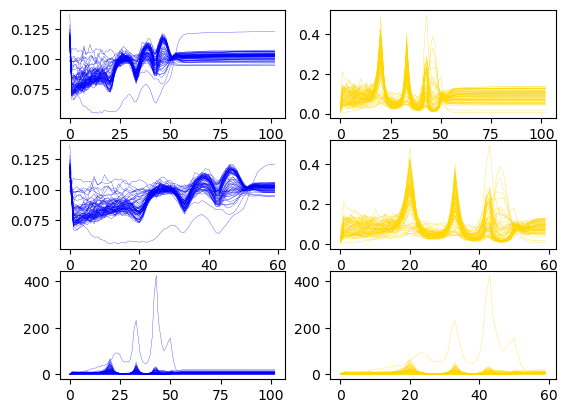

In [196]:
n = len(input_data_test_log_div_norm)
fig_1 = plt.figure()
ax_1_1 = fig_1.add_subplot(3, 2, 1)
ax_1_2 = fig_1.add_subplot(3, 2, 2)
ax_1_3 = fig_1.add_subplot(3, 2, 3)
ax_1_4 = fig_1.add_subplot(3, 2, 4)
ax_1_5 = fig_1.add_subplot(3, 2, 5)
ax_1_6 = fig_1.add_subplot(3, 2, 6)

for i in range(0, n):
    #if i % 100 != 0:
    ax_1_1.plot(input_data_test_log_div_norm[i, :], color='blue', linewidth=0.2)
    ax_1_2.plot(input_data_test_div_norm[i, :], color='gold', linewidth=0.2)
    ax_1_3.plot(input_data_test_log_div_norm_trunc[i, :], color='blue', linewidth=0.2)
    ax_1_4.plot(input_data_test_div_norm_trunc[i, :], color='gold', linewidth=0.2)
    ax_1_5.plot(input_data_test_div[i, :], color='blue', linewidth=0.2)
    ax_1_6.plot(input_data_test_div_trunc[i, :], color='gold', linewidth=0.2)


plt.show()


In [197]:
#generate file name
#path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
#path_1 = path + 'alternative_processing/katse_test/'

path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
path_1 = path + 'alternative_processing/' + "katse_0" + str(katse_nr) + '/'
fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldn' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldn' + '_test.pkl'

data = [input_data_train_log_div_norm,  input_data_valid_log_div_norm, target_data_train, target_data_valid, valid_data_indexes]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_log_div_norm, target_data_test, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)


fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dn' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dn' + '_test.pkl'

data = [input_data_train_div_norm, input_data_valid_div_norm, target_data_train, target_data_valid, valid_data_indexes]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div_norm, target_data_test, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)


fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldnt' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldnt' + '_test.pkl'

data = [input_data_train_log_div_norm_trunc, input_data_valid_log_div_norm_trunc, target_data_train_trunc, target_data_valid_trunc, valid_data_indexes]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_log_div_norm_trunc, target_data_test_trunc, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dnt' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dnt' + '_test.pkl'

data = [input_data_train_div_norm_trunc, input_data_valid_div_norm_trunc, target_data_train_trunc, target_data_valid_trunc, valid_data_indexes]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div_norm_trunc, target_data_test_trunc, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_d' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_d' + '_test.pkl'

data = [input_data_train_div, input_data_valid_div, target_data_train, target_data_valid, valid_data_indexes]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div, target_data_test, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dt' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dt' + '_test.pkl'

data = [input_data_train_div_trunc, input_data_valid_div_trunc, target_data_train_trunc, target_data_valid_trunc, valid_data_indexes]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div_trunc, target_data_test_trunc, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

In [28]:
print()